<a href="https://colab.research.google.com/github/PauForestal/master_bdds/blob/main/M2_AI1_VallejoPaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

---

## **LECTURA Y PRIMERA REVISIÓN DEL DATAFRAME**

---

In [3]:
archivo = 'https://raw.githubusercontent.com/md-lorente/data/master/precio_gasolina.csv'
df = pd.read_csv(archivo, sep = ';', decimal = ',', header = 'infer')

In [4]:
df.head()

,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,01 08 2020 1353,0.758,PCAN,P,dm,LD 24H,LD 24H A,01 08 2020
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,01 08 2020 0900,0.759,OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,01 08 2020
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,27 07 2020 1202,0.769,GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,01 08 2020
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,29 07 2020 0000,0.789,TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,01 08 2020
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,27 07 2020 1159,0.789,GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,01 08 2020


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         9991 non-null   object 
 1   Localidad         9991 non-null   object 
 2   Codigo_postal     9991 non-null   int64  
 3   Direccion         9991 non-null   object 
 4   Margen            9991 non-null   object 
 5   Toma_de_datos     9991 non-null   object 
 6   Precio            9991 non-null   float64
 7   Rotulo            9990 non-null   object 
 8   Tipo_venta        9991 non-null   object 
 9   Rem               9991 non-null   object 
 10  Horario           9991 non-null   object 
 11  Tipo_servicio     9845 non-null   object 
 12  Fecha_extraccion  9991 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1014.8+ KB
None


In [6]:
print(df.isnull().sum())

Provincia             0
Localidad             0
Codigo_postal         0
Direccion             0
Margen                0
Toma_de_datos         0
Precio                0
Rotulo                1
Tipo_venta            0
Rem                   0
Horario               0
Tipo_servicio       146
Fecha_extraccion      0
dtype: int64


> *En una primera revisión, al realizar df.info, se observa que sólo dos variables son numéricas (tanto integer como float), el resto de variables están todas como object lo que podría indicar que son categóricas o cualitativas. Para poder ahondar en este tema, realizaré una copia del dataframe y analizaré en primera instancia bajo el supuesto que esta descripción es correcta.*

In [7]:
#Copia de dataframe, separando por variables numéricas y categóricas, según la información proveída por "df.info"
df_numeric = df.select_dtypes(exclude=['object']).copy()
df_categorical = df.select_dtypes(include=['object']).copy()

---

## **ANALISIS POR VARIABLES**


---

## **Variable: Codigo_postal**

In [8]:
n_categorias = df_numeric['Codigo_postal'].value_counts().count()
tabla_frecuencia = df_numeric['Codigo_postal'].value_counts()

print(f"La cantidad de categorías de la variable Codigo_postal es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Codigo_postal es: 4198. Su tabla de frecuencias se observa a continuación:
41500    23
11500    22
4700     21
11130    21
30500    20
         ..
36612     1
36670     1
36890     1
33570     1
18860     1
Name: Codigo_postal, Length: 4198, dtype: int64


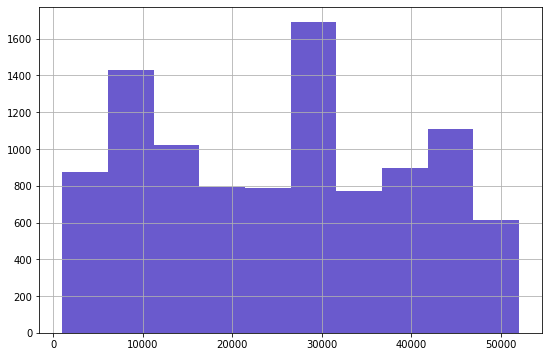

In [9]:
plt.figure(figsize=[9, 6])
df.Codigo_postal.hist(color='slateblue');

**CONCLUSIÓN DE LA VARIABLE 'Codigo_postal'**


---


> Es interesante observar que la variable "Codigo_postal" está compuesta por números pero realmente no aporta información de manera cuantitativa. Es imposible realizar un análisis de ella como tal ya que el número que la compone representa una esquema que se asigna a distintas zonas o lugares de un país con el objetivo de mecanizar el correo.

Dicho lo anterior, se concluye que aún cuando se recoge de manera numérica, esta variable es una **variable categórica o cualitativa de tipo ordinal y en relación al análisis de los datos, también es categórica o de clasificación**



---



---




## **Variable: Precio**


Esta variable es una **variable cuantitativa de tipo continua** ya que a través de ella podemos conocer el valor a pagar por la gasolina. Debido a esto, es que para poder realizar una tabla de frecuencias se debe estimar la cantidad de intervalos para que su análisis sea comprensible y lógico. Una manera de calcular esto es a través de la regla de Sturges que una regla práctica que permite calcular el número de clases que se deben considerar al elaborarse un histograma.

El valor de número de clases es común redondearlo, si el entero del resultado previo al redondeo es "par" se redondea a la alta y si el entero es "impar" se redondea a la baja.

In [10]:
# Cálculo del número de intervalos, según la regla de Sturges
k = 1 + 3.322 * math.log10(len(df))
#k = math.ceil(k)
print(f'El número de clases o intervalos calculados según la regla de Sturges es {k}.\n\nDado que el número entero es par, éste se redondea al alza por lo que la cantidad de intervalos a utilizar es: {math.ceil(k)}')

El número de clases o intervalos calculados según la regla de Sturges es 14.286700961703048.

Dado que el número entero es par, éste se redondea al alza por lo que la cantidad de intervalos a utilizar es: 15


In [11]:
df.Precio.value_counts(bins=15).sort_index()

(0.756, 0.804]       6
(0.804, 0.85]       24
(0.85, 0.896]      105
(0.896, 0.942]      82
(0.942, 0.988]     103
(0.988, 1.034]     358
(1.034, 1.08]      790
(1.08, 1.126]     1138
(1.126, 1.172]    2182
(1.172, 1.218]    3185
(1.218, 1.264]    1925
(1.264, 1.31]       89
(1.31, 1.356]        2
(1.356, 1.402]       0
(1.402, 1.448]       2
Name: Precio, dtype: int64

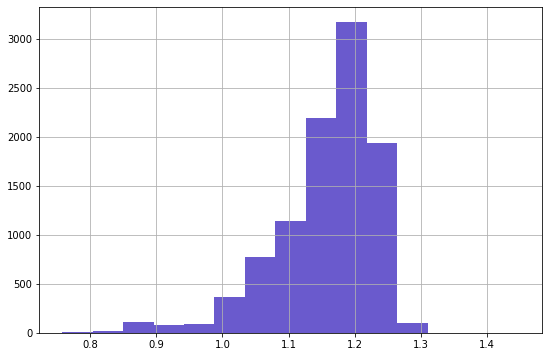

In [12]:
plt.figure(figsize=[9, 6])
df.Precio.hist(color='slateblue', bins=15);

**CONCLUSIÓN DE LA VARIABLE  'Precio'**


---
En función del análisis de datos, esta variable es del tipo **analítica o cuantitativa**


---



---



## **Variable: Provincia**

En el caso de las variables definidas previamente como 'object' en el df.info(), se observó que varias de ellas tenían muchos espacios al inicio y final de la celda, para ello, se realizará una limpieza previa utilizando el método strip(). De esta manera, se eliminan dichos espacios y se asegura que la agrupación de categorías sea más ajustada a la realidad.

In [13]:
for k,v in df_categorical.items():
    df_categorical[k] = df_categorical[k].str.strip()

In [14]:
n_categorias = df_categorical['Provincia'].value_counts().count()
tabla_frecuencia = df_categorical['Provincia'].value_counts()

print(f"La cantidad de categorías de la variable Provincia es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Provincia es: 52. Su tabla de frecuencias se observa a continuación:
MADRID                    730
BARCELONA                 723
VALENCIA                  568
ALICANTE                  408
SEVILLA                   385
MURCIA                    384
MALAGA                    296
CORUNA A                  257
GRANADA                   250
CADIZ                     244
GIRONA                    243
TOLEDO                    235
PALMAS LAS                231
JAEN                      225
SANTA CRUZ DE TENERIFE    223
TARRAGONA                 212
ZARAGOZA                  212
BADAJOZ                   207
ASTURIAS                  203
NAVARRA                   202
CORDOBA                   195
BALEARS ILLES             194
ALMERIA                   184
PONTEVEDRA                184
CIUDAD REAL               183
CASTELLON  CASTELLO       172
LLEIDA                    166
LEON                      159
CANTABRIA                 143
ALBACETE            

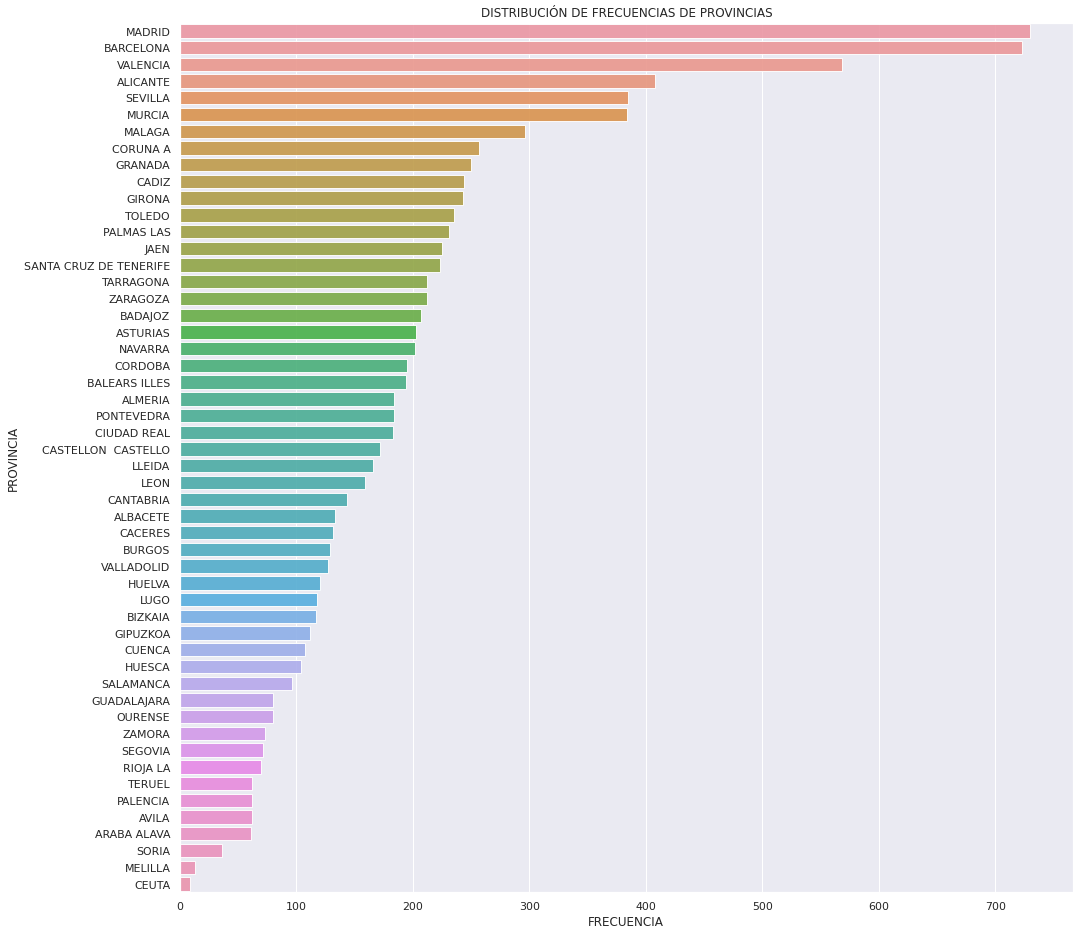

In [15]:
plt.figure(figsize=[16, 16])
sns.set(style="darkgrid")

provincia_count = df_categorical['Provincia'].value_counts()
sns.barplot(x=provincia_count.values, y=provincia_count.index, alpha=0.9);
plt.title('DISTRIBUCIÓN DE FRECUENCIAS DE PROVINCIAS');
plt.ylabel('PROVINCIA', fontsize=12);
plt.xlabel('FRECUENCIA', fontsize=12);

**CONCLUSIÓN DE LA VARIABLE  'Provincia'**

---

Al analizar la variable Provincia, es fácilmente deducible que ésta es una **variable Cualitativa o Categórica Nominal**, dado que las categorías corresponden a los nombres de las Provincias de España y en sí no indican que puedan ser ordenadas (como para considerarlas ordinales). Asimismo, en relación a su análisis, también se considera **categórica o de clasificación.**


---



---



## **Variable: Localidad**

In [16]:
df_categorical.Localidad.unique()

array(['CUESTA LA', 'LA LAGUNA', 'SANTA CRUZ DE TENERIFE', ...,
       'MONTSENY', 'VERGER EL', 'BAUL'], dtype=object)

In [17]:
n_categorias = df_categorical['Localidad'].value_counts().count()
tabla_frecuencia = df_categorical['Localidad'].value_counts()

print(f"La cantidad de categorías de la variable Localidad es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Localidad es: 3829. Su tabla de frecuencias se observa a continuación:
MADRID       203
BARCELONA     85
SEVILLA       65
VALENCIA      58
MALAGA        54
            ... 
LIENDO         1
VEREA          1
BANDE          1
VALEIXE        1
BAUL           1
Name: Localidad, Length: 3829, dtype: int64


**CONCLUSIÓN DE LA VARIABLE  'Localidad'**

---

Al igual que la variable Provincia, la variable Localidad es una **variable Cualitativa o Categórica del tipo Nominal**. Esta variable permite conocer con más precisión la ubicación del lugar que se está analizando. A su vez, en función del análisis de los datos, es una variable **Categórica o de Clasificación.**


---



---



## **Variable: Dirección**

In [14]:
n_categorias = df_categorical['Direccion'].value_counts().count()
tabla_frecuencia = df_categorical['Direccion'].value_counts()

print(f"La cantidad de categorías de la variable Dirección es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Dirección es: 9697. Su tabla de frecuencias se observa a continuación:
AVENIDA ANDALUCIA SN                                        11
AVENIDA JUAN CARLOS I SN                                     7
AVENIDA CONSTITUCION SN                                      5
AVENIDA DEL MEDITERRANEO SN                                  4
AVENIDA PORTUGAL SN                                          3
                                                            ..
POLIGONO POLIGONO INDUSTRIAL EL CERRO LUZ DE CASTILLA SN     1
AVENIDA FEDERICO SILVA MUNOZ 21                              1
CR N631 43 4                                                 1
CARRETERA N620 KM 307 000                                    1
AUTOVIA A92 KM 322                                           1
Name: Direccion, Length: 9697, dtype: int64


**CONCLUSIÓN DE LA VARIABLE  'Dirección'**

---

Al igual que la variable Provincia y Localidad, la variable **Direccion** es una **variable Cualitativa o Categórica del tipo Nominal** y en relación al análisis de los datos, es una variable **Categórica o de Clasificación.**


---



---



## **Variable: Margen**

In [15]:
n_categorias = df_categorical['Margen'].value_counts().count()
tabla_frecuencia = df_categorical['Margen'].value_counts()

print(f"La cantidad de categorías de la variable Margen es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Margen es: 3. Su tabla de frecuencias se observa a continuación:
D    5016
I    2596
N    2379
Name: Margen, dtype: int64


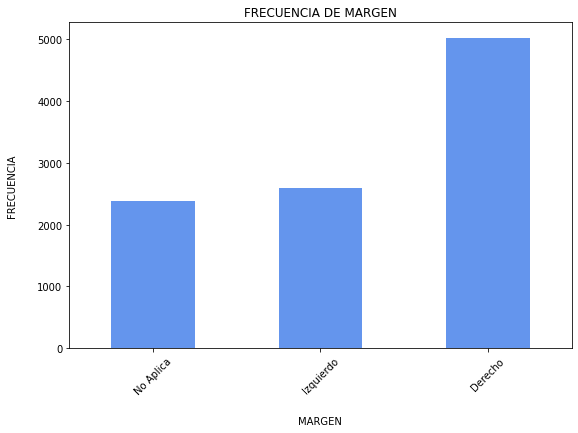

In [146]:
plt.figure(figsize=[9, 6])

ax = df.Margen.value_counts().sort_values().plot(kind = 'bar', color='cornflowerblue', align='center');
ax.set_xlabel('MARGEN', labelpad=20)
ax.set_ylabel('FRECUENCIA', labelpad=20)
ax.set_title('FRECUENCIA DE MARGEN')
ax.set_xticklabels(['No Aplica','Izquierdo','Derecho'], rotation = 45);

**CONCLUSIÓN DE LA VARIABLE  'Margen'**

---

Esta variable permite conocer si la estación de servicio está a la izquierda o derecha del conductor. Consta de 3 categorías, dos de las cuales refieren a si se encuentra a la derecha o a la izquierda. La tercera categoría "No Aplica" puede deberse a que no se tiene certeza de la ubicación o que simplemente no se registra en el dataset. Esta variable es **Categórica o Cualitativa del tipo Nominal.**

En función del análisis de datos, es una **variable categórica o de clasificación**


---



---



## **Variable: Toma_de_datos**




In [23]:
n_categorias = df_categorical['Toma_de_datos'].value_counts().count()
tabla_frecuencia = df_categorical['Toma_de_datos'].value_counts().sort_index().head(50)

print(f"La cantidad de categorías de la variable Toma_de_datos es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Toma_de_datos es: 2800. Su tabla de frecuencias se observa a continuación:
01 08 2020 0000    2857
01 08 2020 0001      32
01 08 2020 0003       1
01 08 2020 0005       3
01 08 2020 0024       1
01 08 2020 0036       1
01 08 2020 0043       1
01 08 2020 0044       1
01 08 2020 0100       1
01 08 2020 0107       1
01 08 2020 0121       1
01 08 2020 0122       1
01 08 2020 0126       1
01 08 2020 0130       1
01 08 2020 0132       1
01 08 2020 0133       1
01 08 2020 0137       2
01 08 2020 0203       1
01 08 2020 0206       1
01 08 2020 0208       1
01 08 2020 0219       1
01 08 2020 0236       1
01 08 2020 0243       1
01 08 2020 0303       1
01 08 2020 0305       1
01 08 2020 0313       1
01 08 2020 0326       1
01 08 2020 0330       1
01 08 2020 0344       1
01 08 2020 0400       1
01 08 2020 0415       1
01 08 2020 0505       1
01 08 2020 0530       5
01 08 2020 0545       1
01 08 2020 0555       1
01 08 2020 0557       1
01 08 2020 0559     

**CONCLUSIÓN DE LA VARIABLE  'Toma_de_datos'**

---

Esta variable indica la fecha y la hora en que se tomó el registro del Precio de gasolina. Es una variable que en su origen está recolectada como cuantitativa y en efecto el tiempo como variable general es una variable cuantitativa y del tipo continua. No obstante lo anterior, se observa que el formato de recolección, tal como está, no permite que se utilice numéricamente y más bien está representada como una variable **Categórica o Cualitativa del tipo Ordinal.**

En función del análisis de datos, es una **variable categórica o de clasificación**

Pienso que en términos del trabajo, es una variable que debiera transformarse para poder ser utilizada como Analítica o cuantitativa. Separarla en fecha y hora, o bien, darle el formato correcto (por ejemplo: `df.Toma_de_datos = pd.to_datetime(df.Toma_de_datos)`) para que tenga una lógica de uso.


---



---



## **Variable: Rotulo**

In [19]:
n_categorias = df_categorical['Rotulo'].value_counts().count()
tabla_frecuencia = df_categorical['Rotulo'].value_counts().head(50)

print(f"La cantidad de categorías de la variable Rotulo es: {n_categorias}.\n\nSu tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Rotulo es: 2817.

Su tabla de frecuencias se observa a continuación:
REPSOL              2707
CEPSA               1335
GALP                 519
SHELL                373
BP                   219
PETRONOR             182
AVIA                 153
CARREFOUR            142
BALLENOIL            123
CAMPSA                98
Q8                    83
PETROPRIX             75
ESCLATOIL             51
BONAREA               51
AGLA                  47
VALCARCE              44
ALCAMPO               42
EROSKI                42
MEROIL                41
PLENOIL               40
GASEXPRESS            38
DISA                  31
TAMOIL                28
IBERDOEX              23
PETROCAT              22
BEROIL                20
SIN ROTULO            18
PETROCAT DIRECTE      17
PCAN                  17
BP OIL                16
E LECLERC             16
CAMPSA EXPRESS        15
AUTONET&OIL           14
BDMED                 13
EASYGAS               13
CONFORT AUTO   

**CONCLUSIÓN DE LA VARIABLE  'Rotulo'**

---

Esta variable indica el nombre de la empresa que distribuye la gasolina. Es una variable **Categórica o Cualitativa del tipo Nominal.**

En función del análisis de datos, es una **variable categórica o de clasificación**


---



---



## **Variable: Tipo_venta**

In [20]:
n_categorias = df_categorical['Tipo_venta'].value_counts().count()
tabla_frecuencia = df_categorical['Tipo_venta'].value_counts()

print(f"La cantidad de categorías de la variable Tipo_venta es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Tipo_venta es: 5. Su tabla de frecuencias se observa a continuación:
P    9772
R     168
A      43
p       6
N       2
Name: Tipo_venta, dtype: int64


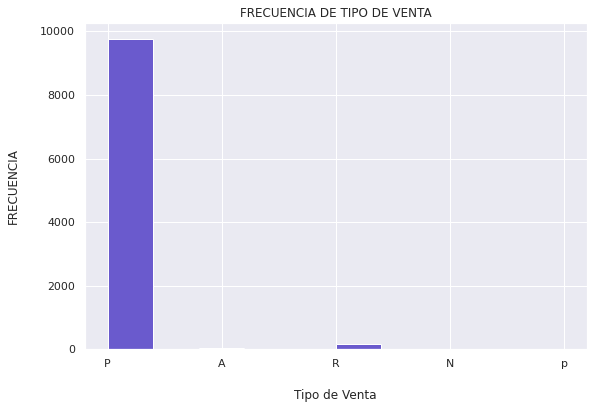

In [42]:
plt.figure(figsize=[9, 6])
ax = df.Tipo_venta.hist(color='slateblue');
ax.set_xlabel('Tipo de Venta', labelpad=20)
ax.set_ylabel('FRECUENCIA', labelpad=20)
ax.set_title('FRECUENCIA DE TIPO DE VENTA');

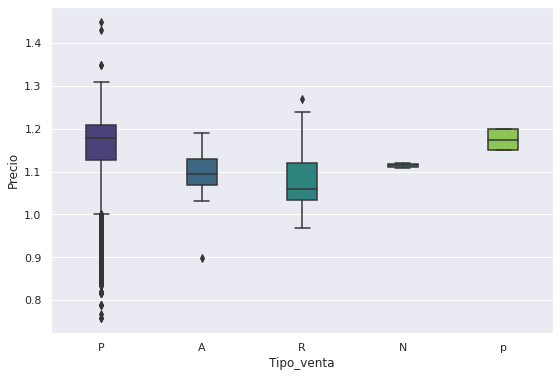

In [50]:
plt.figure(figsize=[9, 6])
sns.boxplot( x=df["Tipo_venta"], y=df["Precio"],  palette="viridis", width=0.3);
plt.show()

**CONCLUSIÓN DE LA VARIABLE  'Tipo_venta'**

---

Esta variable, como su nombre lo indica, se refiere al tipo de venta, es decir si es a público general (P) o a Cooperativistas (R). Si bien, esto es lo que se explicita en el sitio oficial que entrega la información, aparecen otras categorías que no están formalmente definidas pero, a través del gráfico de boxplot desplegado en celda anterior en que se relaciona esta variable con el Precio, se podría suponer que:
- A: Autoservicio (tiene un precio medio menor que para Publico general, esto al menos tiene lógica).
- N: (tal como ocurre con otras variables dentro de este dataset) podría referirse a "No Aplica", en gráfico y tabla de frecuencias además se observa que la cantidad de datos (y su variabilidad) es muy pequeña.
- p: un error de tipografía y significar lo mismo que P (esto es muy posible toda vez que representa sólo 6 casos del total de los datos y se posiciona muy similar a P cuando se analiza en relación al precio) 

Esta variable es **Categórica o Cualitativa del tipo Nominal.**

En función del análisis de datos, es una **variable categórica o de clasificación**


---



---



## **Variable: Rem**

In [21]:
n_categorias = df_categorical['Rem'].value_counts().count()
tabla_frecuencia = df_categorical['Rem'].value_counts()

print(f"La cantidad de categorías de la variable Rem es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Rem es: 2. Su tabla de frecuencias se observa a continuación:
dm    6286
OM    3705
Name: Rem, dtype: int64


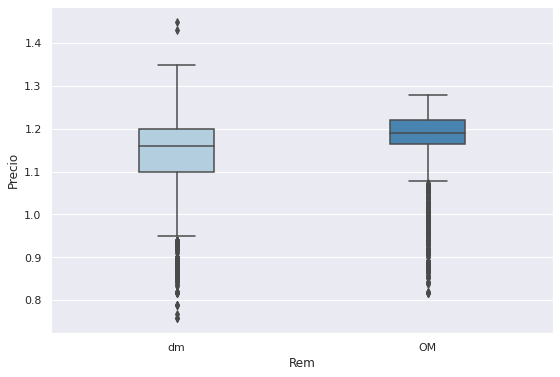

In [53]:
plt.figure(figsize=[9, 6])
sns.boxplot( x=df["Rem"], y=df["Precio"],  palette="Blues", width=0.3);
plt.show()

**CONCLUSIÓN DE LA VARIABLE  'Rem'**

---

Esta variable indica si los datos provienen de un operador Mayorista (OM) o bien de un distribuidor minorista (dm). Es interesante observar en primera instancia (a través de boxplot) cómo los precios son mayores cuando el operador es Mayorista pero son más simétricos dado que la mediana está practicamente en la mitad. En el caso del distribuidor minorista se observa mas asimetría en los datos y también outliers tanto en el límite superior como en el inferior.

Esta variable es **Categórica o Cualitativa del tipo Binaria.**

En función del análisis de datos, es una **variable categórica o de clasificación pero dado que es binaria, también puede ser analítica**


---



---



## **Variable: Horario**

In [54]:
n_categorias = df_categorical['Horario'].value_counts().count()
tabla_frecuencia = df_categorical['Horario'].value_counts().sort_index().head(50)

print(f"La cantidad de categorías de la variable Horario es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Horario es: 1309. Su tabla de frecuencias se observa a continuación:
D 07002100                                       1
D 07002300                                       1
D 08002000                                       1
L 00052300                                       1
L 04002200                                       1
L 05000000                                       1
L 05002300                                       1
L 05300030                                       1
L 05302230                                       1
L 06000000                                      13
L 06000000 MD 24H                                1
L 06000000 MV 06002300 SD 07002300               1
L 06000000 VD 06000000                           1
L 06000059                                       1
L 06001000                                       1
L 06001200                                       2
L 06001345 y 14002300                            1
L 06001500             

**CONCLUSIÓN DE LA VARIABLE  'Horario'**

---

Esta variable indica los días de la semana y los horarios en que la Estación de Servicio está abierta durante la semana. Es **Categórica o Cualitativa del tipo Nominal.**

En función del análisis de datos, es una **variable categórica o de clasificación**

Tal como ocurre con todas las variables relacionadas a fecha o tiempo, si bien su origen es Cuantitativo del tipo continuo, se presenta con estructura de varible categórica pero bien podría trabajarse para poder darle formato con datetime y así poder hacer análisis apropiados al tipo de variable (por ejemplo cantidad de horas que permanece abierta una estación en relación al total de Estaciones, o analizar si existe alguna relación entre el precio de la gasolina y la cantidad de tiempo que permanece abierta la estación de servicio, entre otras interrogantes).

---



---



## **Variable: Tipo_servicio**

In [55]:
n_categorias = df_categorical['Tipo_servicio'].value_counts().count()
tabla_frecuencia = df_categorical['Tipo_servicio'].value_counts().head(50)

print(f"La cantidad de categorías de la variable Tipo_servicio es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Tipo_servicio es: 1613. Su tabla de frecuencias se observa a continuación:
LD 24H  A                                     3318
LD 06002200  A                                1180
LD 07002300  A                                 616
LD 07002200  A                                 234
LD 06002300  A                                 214
LD 07002300  P                                 160
LD 24H  D                                      129
LD 06002359  A                                 122
LD 06302230  A                                 121
LD 06002200  P                                 113
LD 06000000  A                                  89
LD 07002100  A                                  84
L 06002200  A                                   71
LD 24H  P                                       65
L 07002300  A                                   65
LD 08002200  A                                  48
L 07002200  A                                   47
LD 00000600  A   

**CONCLUSIÓN DE LA VARIABLE  'Tipo_servicio'**

---

Esta variable permite relacionar el horario de apertura y cierre de la Estación de Servicio con el tipo de servicio que ofrece:

P: Servicio asistido por personal, 
A: Autoservicio por parte del cliente, con presencia de personal en la instalación, 
D: Autoservicio por parte del cliente, sin presencia de personal en la instalaciones 

Es una variable **Categórica o Cualitativa del tipo Nominal.**

En función del análisis de datos, es una **variable categórica o de clasificación**

Esta variable contiene información desagregada y por lo tanto, no existe posibilidad de tratarla de otra manera que no sea como categórica nominal (aun cuando parte de su esencia es entregar información relacionada con días y horarios). Esto dado que dependiendo del horario de apertura y cierre, algunas estaciones de servicio entregan diferentes tipo de servicios, es así como por ejemplo, se puede observar que en algunas estaciones de servicio de lunes a viernes y durante las 24 horas la estación es Autoservicio asistido por personal, no obstante el fin de semana el servicio cambia a P y en un horario de cierre hasta las 21:00 hrs.

Un tratamiento que se puede dar es separarla en diferentes variables y diferenciar cuando la Estación de Servicio ofrece más de un servicio según sus horarios, pero ello implica cambiar la estructura del dataset y no es algo que se pueda decidir en esta etapa del análisis (depende básicamente de los objetivos del análisis).


---



---



## **Variable: Fecha_extraccion**

In [51]:
n_categorias = df_categorical['Fecha_extraccion'].value_counts().count()
tabla_frecuencia = df_categorical['Fecha_extraccion'].value_counts()

print(f"La cantidad de categorías de la variable Fecha_extraccion es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Fecha_extraccion es: 1. Su tabla de frecuencias se observa a continuación:
01 08 2020    9991
Name: Fecha_extraccion, dtype: int64


**CONCLUSIÓN DE LA VARIABLE  'Fecha_extraccion'**

---

Esta variable es en origen Cuantitativa de tipo continua, pero al igual que la variable Toma_de_datos, se presenta cómo **Categórica o Cualitativa del tipo Ordinal.**

En función del análisis de datos, es una **variable categórica o de clasificación** pero creo que puede trabajarse con datetime para poder analizarla apropiadamente.


---



---

